In [1]:
import xarray as xr

In [2]:
%pip install netCDF4

Note: you may need to restart the kernel to use updated packages.


In [3]:
dataset = xr.load_dataset("/Users/ghadirabbas/Downloads/PreBootcampExercises/steinmetz_neuromatch_dataset/steinmetz_2016-12-14_Cori.nc")

`alldat` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = alldat[k]`, you have the fields below. For extra variables, check out the extra notebook and extra data files (lfp, waveforms and exact spike times, non-binned). 

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['ccf']`: Allen Institute brain atlas coordinates for each neuron. 
* `dat['ccf_axes']`: axes names for the Allen CCF. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_time']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: turning speed of the wheel that the mice uses to make a response, sampled at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position.
* `dat['face']`: average face motion energy from a video camera. 
* `dat['licks']`: lick detections, 0 or 1.   
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 
* `dat['prev_reward']`: time of the feedback (reward/white noise) on the previous trial in relation to the current stimulus time. 
* `dat['reaction_time']`: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above `5` ticks/10ms bin. Second column: direction of the wheel movement (`0` = no move detected).  


The original dataset is here: https://figshare.com/articles/dataset/Dataset_from_Steinmetz_et_al_2019/9598406

In [4]:
dataset.wheel

<xarray.DataArray 'wheel' (trial: 364, time: 250)>
array([[-1,  0,  0, ...,  1,  0,  1],
       [ 0, -1,  0, ...,  1,  0,  0],
       [ 0,  0, -1, ..., -1,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int8)
Coordinates:
  * trial    (trial) int32 1 2 3 4 5 6 7 8 9 ... 357 358 359 360 361 362 363 364
  * time     (time) float64 0.01 0.02 0.03 0.04 0.05 ... 2.46 2.47 2.48 2.49 2.5

In [5]:
dataset.wheel.values

array([[-1,  0,  0, ...,  1,  0,  1],
       [ 0, -1,  0, ...,  1,  0,  0],
       [ 0,  0, -1, ..., -1,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int8)

In [6]:
wheel_data = dataset.wheel.to_dataframe().reset_index()

In [7]:
import seaborn as sns 

<AxesSubplot:xlabel='time', ylabel='wheel'>

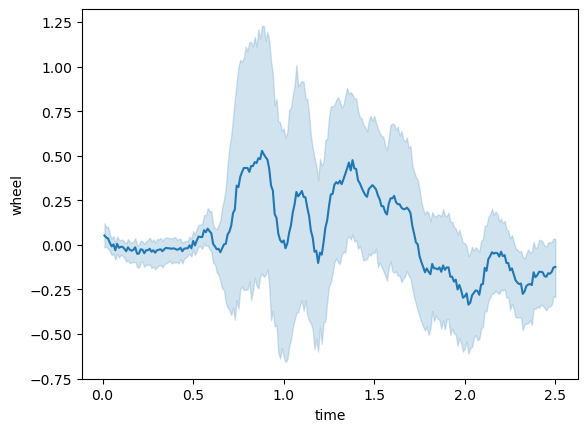

In [8]:
sns.lineplot(data=wheel_data, x='time', y='wheel')

In [9]:
dataset


<xarray.Dataset>
Dimensions:             (trial: 364, time: 250, cell: 734, waveform_component: 3, sample: 82, probe: 384, brain_area_lfp: 7, spike_id: 2446173)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 359 360 361 362 363 364
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 729 730 731 732 733 734
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'ACA' 'LS' ... 'SUB' 'VISp'
  * spike_id            (spike_id) int32 1 2 3 4 ... 2446171 2446172 2446173
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 0 100 0 50 0 0 ... 0 100 50 50 0 25 100
    contrast_right      (trial) int8 0 50 50 0 100 0 0 ... 25 100 25 25 50 0 100
    gocue               (trial) float64 1.027 0.8744 0.8252 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.187 1.438 0.986 2.296 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -2.851 ... 5.571
    spike_time          (spike_id) float32 0.2676 2.308 0.8535 ... 2.189 2.399
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 734 734 734 734 734
    spike_trial         (spike_id) uint32 21 21 31 37 43 ... 364 364 364 364 364
Attributes:
    session_date:  2016-12-14
    mouse:         Cori
    stim_onset:    0.5
    bin_size:      0.01

In [14]:
spike_data = dataset[["spike_rate","active_trials"]].to_dataframe().reset_index()
spike_data[spike_data.active_trials]

,cell,trial,time,spike_rate,active_trials
0,1,1,0.01,0,True
1,1,1,0.02,0,True
2,1,1,0.03,0,True
3,1,1,0.04,0,True
4,1,1,0.05,0,True
...,...,...,...,...,...
66756495,734,214,2.46,0,True
66756496,734,214,2.47,0,True
66756497,734,214,2.48,0,True
66756498,734,214,2.49,0,True


In [15]:
spike_data_active = spike_data[spike_data.active_trials]

KeyboardInterrupt: 

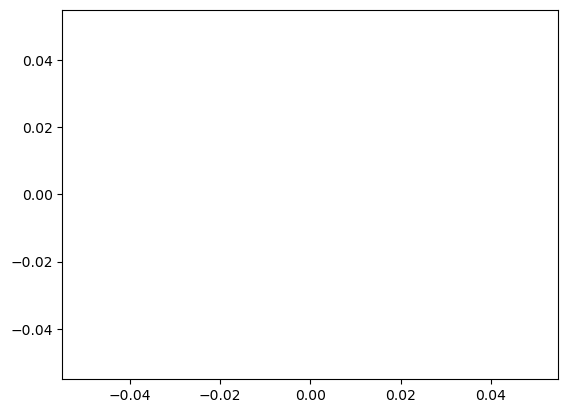

In [16]:
sns.lineplot(data=spike_data_active, x="time", y= "spike_rate")

In [17]:
import pandas as pd

In [21]:
spike_data_active.groupby(['trial','time'])

In [33]:
aa = (4, 6)
aa

(4, 6)

In [34]:
var1, var2 = aa
var1

4

In [35]:
pop_act =[]
for (trial, time), df in spike_data_active.groupby(['trial','time']):
   m =  df.spike_rate.mean()
   pop_act.append((m,trial,time))

    


In [27]:
len(pop_act)

53500

In [28]:
import numpy as np

In [36]:
pop_act_np =np.array(pop_act)

In [37]:
pop_act_np.shape


(53500, 3)

In [38]:
dd= pd.DataFrame(pop_act_np,columns=['mean_s', 'trial', 'time'])

In [39]:
dd

,mean_s,trial,time
0,0.038147,1.0,0.01
1,0.036785,1.0,0.02
2,0.039510,1.0,0.03
3,0.050409,1.0,0.04
4,0.040872,1.0,0.05
...,...,...,...
53495,0.029973,214.0,2.46
53496,0.028610,214.0,2.47
53497,0.010899,214.0,2.48
53498,0.016349,214.0,2.49


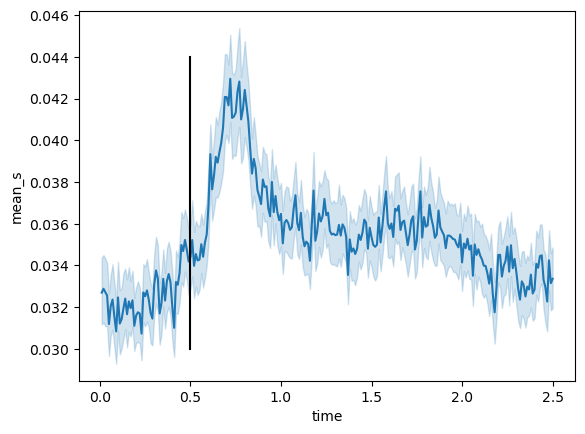

In [49]:
import matplotlib.pyplot as plt
sns.lineplot(data=dd , x= "time", y='mean_s')
plt.plot([0.5, 0.5], [0.03,0.044], color='k', alpha=1)